In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("F:\\credit_card_fault_prediction\\Notebook\\UCI_Credit_Card.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [4]:
df.duplicated().sum()

0

In [5]:
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default_payment_next_month    0
dtype: int64

In [6]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [7]:
target_col=df["default_payment_next_month"]
target_col

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default_payment_next_month, Length: 30000, dtype: int64

In [8]:
df['default_payment_next_month'].value_counts()

default_payment_next_month
0    23364
1     6636
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x21ced200b10>,
 [Text(-0.8449152390547128, 0.704356613380692, 'Not default_payment_next_month'),
  Text(0.8449152720280249, -0.7043565738273541, 'default_payment_next_month')],
 [Text(-0.46086285766620694, 0.38419451638946833, '77.88%'),
  Text(0.46086287565164985, -0.38419449481492035, '22.12%')])

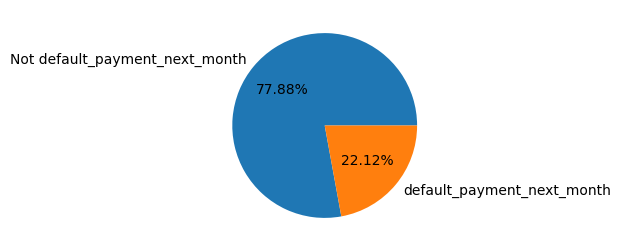

In [9]:
plt.figure(figsize=(3,3))
plt.pie(df['default_payment_next_month'].value_counts().values, 
        labels=['Not default_payment_next_month','default_payment_next_month'],autopct='%0.2f%%')

In [10]:
data = df.drop("default_payment_next_month",axis=1)
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [11]:
numerical_feature=[feature for feature in data.columns if data[feature].dtype != 'O']
numerical_feature

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

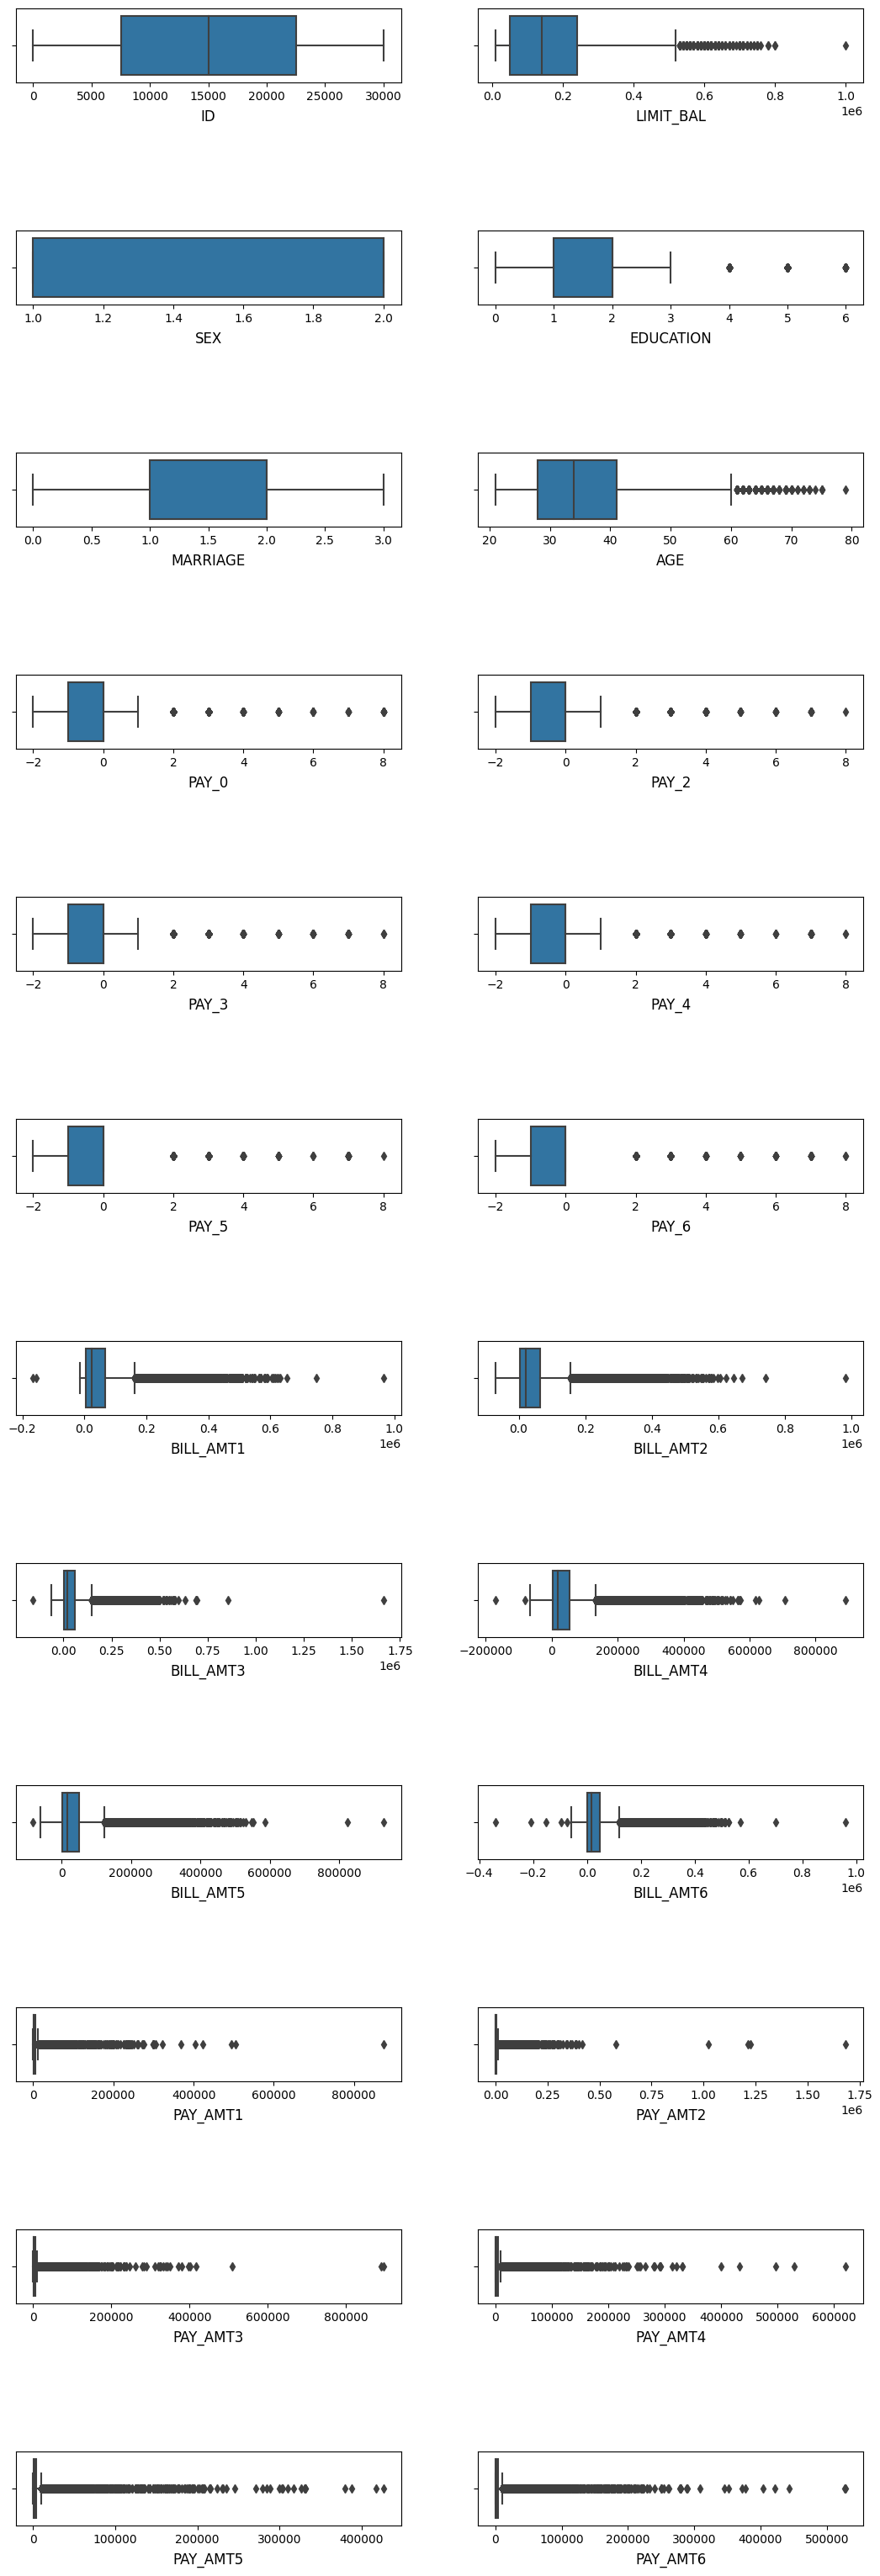

In [12]:
plt.figure(figsize=(13,80))
for i,col_name in enumerate(numerical_feature):
    plt.subplot(len(numerical_feature),2,i+1)
    sns.boxplot(x=col_name,data=data)
    plt.xticks(fontsize=10)
    plt.xlabel(col_name,labelpad=6, fontsize=12)
plt.subplots_adjust(hspace=2.0)

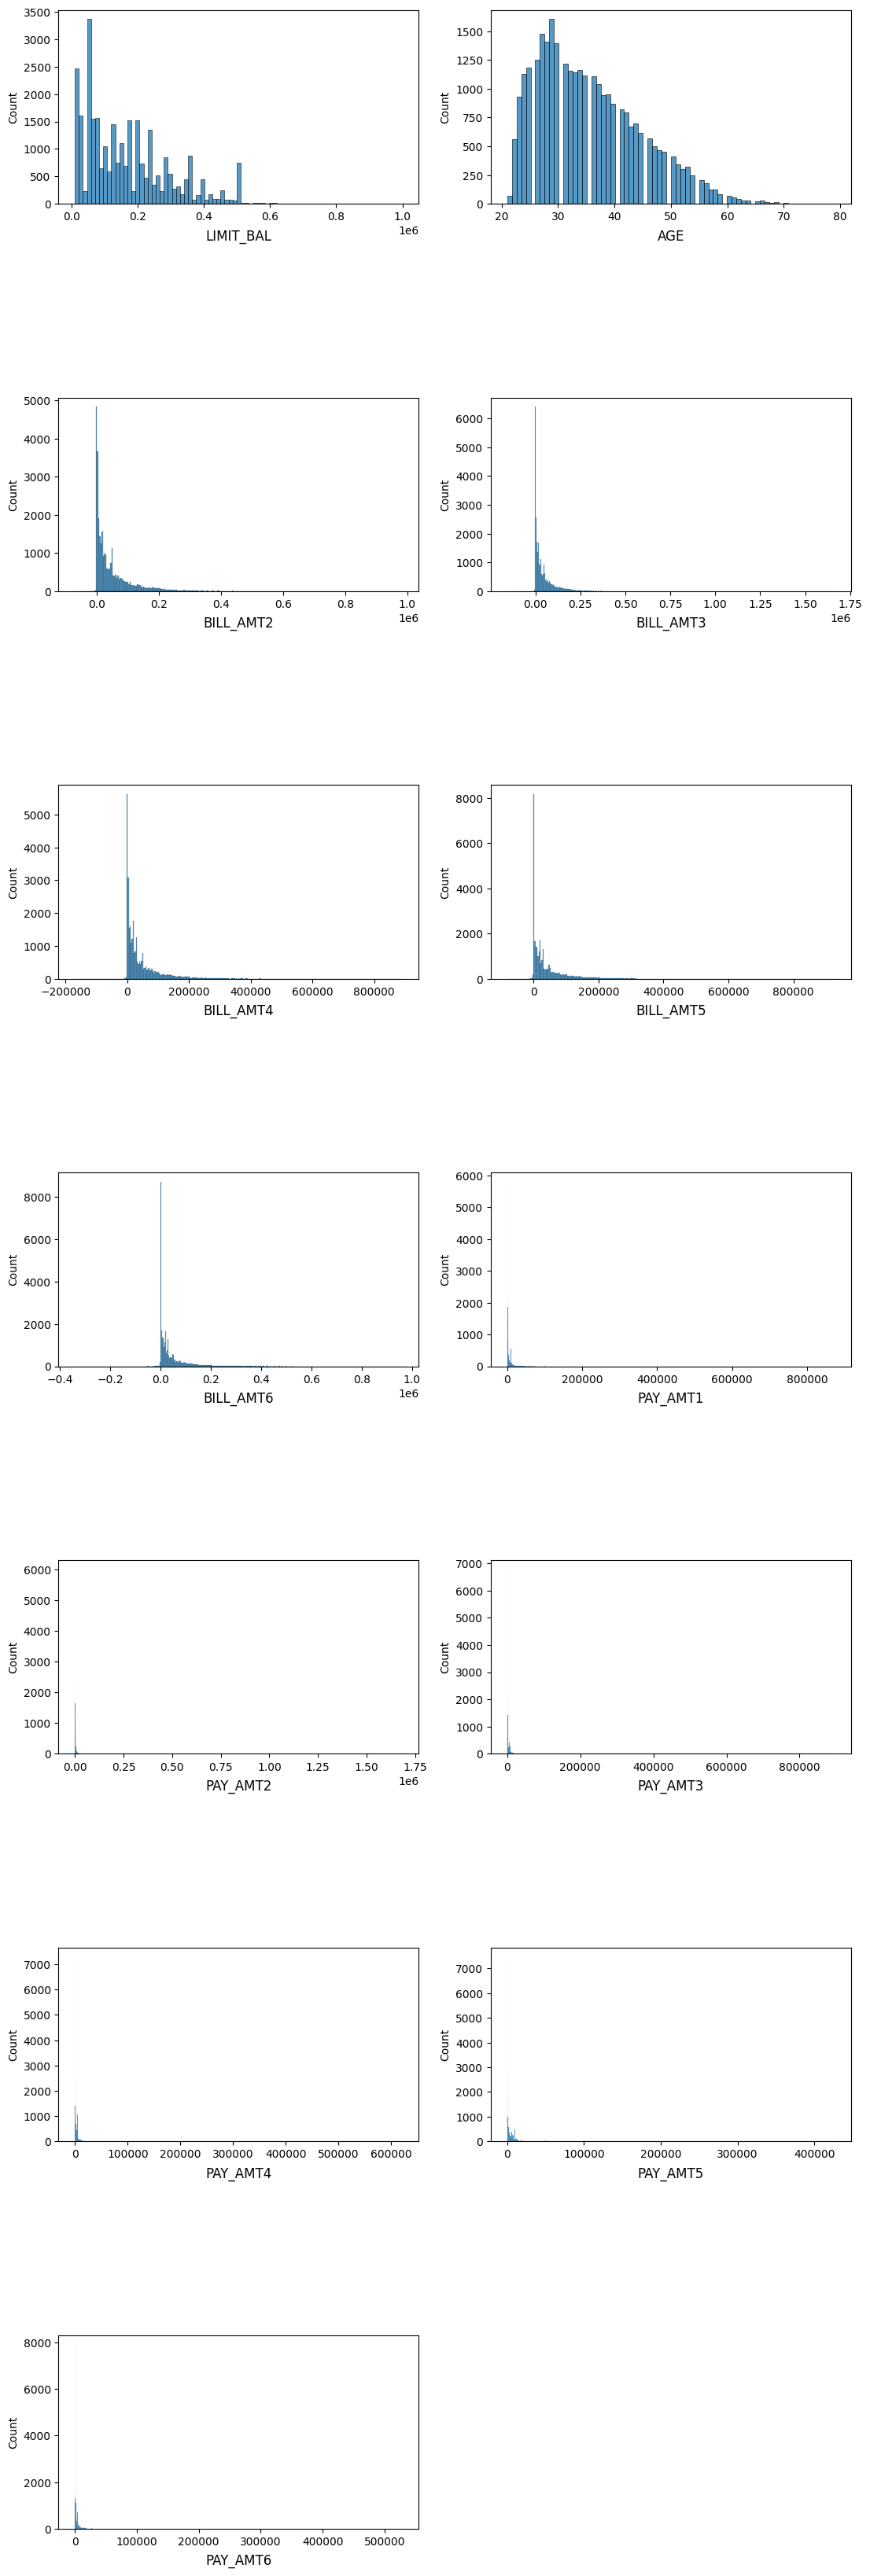

In [13]:
plt.figure(figsize=(13,80))
for i,col_name in enumerate(numerical_feature[1:2] + numerical_feature[5:6] + numerical_feature[13:24]):
    plt.subplot(len(numerical_feature[1:2] + numerical_feature[5:6] + numerical_feature[13:24]),2,i+1)
    sns.histplot(x=col_name,data=data)
    plt.xticks(fontsize=10)
    plt.xlabel(col_name,labelpad=6, fontsize=12)
plt.subplots_adjust(hspace=1.0)

In [14]:
data.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0


In [15]:
def outlier_treatment(dataset,features):
    for feature in features:
        upper_bound = dataset[feature].mean() + 3*dataset[feature].std()
        lower_bound = dataset[feature].mean() - 3*dataset[feature].std()
        dataset.loc[dataset[feature]>upper_bound,feature]=upper_bound
        dataset.loc[dataset[feature]<lower_bound,feature]=lower_bound

In [15]:
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# Step 1: Define the transformer for Robust Scaling


class OutlierHandler(BaseEstimator, TransformerMixin):
    def __init__(self):
        # Add any initialization code if needed
        pass
    
    def fit(self, X, y=None):
        # No need to fit, as we're applying a fixed transformation
        return self
    
    def transform(self, data):
        # Apply the outlier handling logic to the input data X
        transformed_X = data.copy()  # Make a copy to avoid modifying the original data
        
        for feature in numerical_feature:  # Assuming numerical_feature contains the column names
            upper_bound = transformed_X[feature].mean() + 3 * transformed_X[feature].std()
            lower_bound = transformed_X[feature].mean() - 3 * transformed_X[feature].std()
            transformed_X.loc[transformed_X[feature] > upper_bound, feature] = upper_bound
            transformed_X.loc[transformed_X[feature] < lower_bound, feature] = lower_bound
        
        return transformed_X
    
class CdataFrame(BaseEstimator, TransformerMixin):
    def __init__(self):
        # Add any initialization code if needed
        pass
    
    def fit(self, X, y=None):
        # No need to fit, as we're applying a fixed transformation
        return self
    
    def transform(self,transformed_df:pd.DataFrame,target_col:pd.DataFrame):
        feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=42))
        feature_sel_model.fit(transformed_df,target_col)
        selected_feature = transformed_df.columns[feature_sel_model.get_support()]
        return selected_feature
    
class FeatureSelection(BaseEstimator, TransformerMixin):
    def __init__(self):
        # Add any initialization code if needed
        pass
    
    def fit(self, X, y=None):
        # No need to fit, as we're applying a fixed transformation
        return self
    
    def transform(self,transformed_df:pd.DataFrame,target_col:pd.DataFrame):
        feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=42))
        feature_sel_model.fit(transformed_df,target_col)
        selected_feature = transformed_df.columns[feature_sel_model.get_support()]
        return selected_feature

num_pipeline_1= Pipeline(
                steps= [
                    ("Outlier_Handler",OutlierHandler()),
                    ("Scaler",RobustScaler())
                ]
)

num_pipeline_2= Pipeline(
                steps= [
                    ("Outlier_Handler",OutlierHandler()),
                    ("Scaler",RobustScaler())
                ]
)

num_pipeline_3= Pipeline(
                steps= [
                    ("Outlier_Handler",OutlierHandler()),
                    ("Scaler",RobustScaler())
                ]
)
# Assuming you have defined 'data' and 'numerical_feature' somewhere
preprocessor = ColumnTransformer(
    [
        ("num_pipeline",num_pipeline,numerical_feature),
    ]
)


transformed_data = preprocessor.fit_transform(data)


In [17]:
transformed_df =pd.DataFrame(transformed_data,columns=data.columns)

In [18]:
transformed_df.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-1.000000,-0.631579,0.0,0.0,-1.0,-0.769231,2.0,2.0,-1.0,-1.0,...,-0.337391,-0.365126,-0.373848,-0.356074,-0.524214,-0.316775,-0.437424,-0.403524,-0.39693,-0.386374
1,-0.999933,-0.105263,0.0,0.0,0.0,-0.615385,-1.0,2.0,0.0,0.0,...,-0.302730,-0.302419,-0.302504,-0.288055,-0.524214,-0.242141,-0.194411,-0.134508,-0.39693,0.128791


In [19]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [20]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0))
feature_sel_model.fit(transformed_df,target_col)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [21]:
feature_sel_model.get_support()

array([False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False, False, False, False, False,
        True,  True,  True,  True,  True,  True])

In [22]:
selected_feature = transformed_df.columns[feature_sel_model.get_support()]

In [23]:
selected_feature

Index(['EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4',
       'PAY_5', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4',
       'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [24]:
print("Total feature:{}".format(transformed_df.shape[1]))
print("Selected feature:{}".format(len(selected_feature)))
print("feature with coefficients shrank to zero:{}".format(np.sum(feature_sel_model.estimator_.coef_ == 0)))

Total feature:24
Selected feature:15
feature with coefficients shrank to zero:9


In [25]:
X=transformed_df[selected_feature]
y=target_col


In [26]:
X.head(2)

,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.0,-1.0,-0.769231,2.0,2.0,-1.0,-1.0,-2.0,-0.290695,-0.524214,-0.316775,-0.437424,-0.403524,-0.39693,-0.386374
1,0.0,0.0,-0.615385,-1.0,2.0,0.0,0.0,0.0,-0.310071,-0.524214,-0.242141,-0.194411,-0.134508,-0.39693,0.128791


In [27]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: default_payment_next_month, dtype: int64

In [28]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((24000, 15), (6000, 15))

In [29]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
os= RandomOverSampler(sampling_strategy=0.70)
X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)
print("the number of classes before fit {}".format(Counter(y_train)))
print("the number of classes after fit {}".format(Counter(y_train_ns)))

the number of classes before fit Counter({0: 18677, 1: 5323})
the number of classes after fit Counter({0: 18677, 1: 13073})


In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from xgboost import XGBClassifier

In [31]:
def evaluate_model(true, predicted):
    accuracy = accuracy_score(true, predicted)
    cm = confusion_matrix(true, predicted)
    cr = classification_report(true, predicted)
    rs = recall_score(true, predicted)
    return accuracy, cm, cr,rs

In [32]:
models = {
    "Logistic_Regressor": LogisticRegression(),
    #"KNeighbors_Classifier": KNeighborsClassifier(),
    "Decision_Classifier": DecisionTreeClassifier(),
    "Random_Forest_Classifier": RandomForestClassifier(),
    "XGBClassifier": XGBClassifier(), 
    "AdaBoost_Classifier": AdaBoostClassifier(),
    "GradientBoosting_Classifier":GradientBoostingClassifier()
}

In [33]:
log_grid={'C':10.0 **np.arange(-2,3),
          'penalty':['l1','l2'],
          #'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
         }


random_grid={'n_estimators':[int(x) for x in np.linspace(start=100, stop=1000, num=100)],
             'max_features':['sqrt','log2'],
             'criterion':['gini','entropy', 'log_loss'],
             'max_depth':[2,4,6,10]}

tree_grid={'criterion':['gini','entropy','log_loss'],
           'max_features':['auto','sqrt','log2'],
           'max_depth':[3, 5, 7],
           'min_samples_split': [2, 5, 10],
           'min_samples_leaf': [1, 2, 3]
           
          }

knn_grid={'n_neighbors':[10, 15, 20,],
         'algorithm':['auto','ball_tree', 'kd_tree',],
          'weights': ['uniform', 'distance'],
         }

xgb_grid={
    'eta': [0.1, 0.2, 0.3],                  
    'max_depth': [3, 5, 7],                  
    'subsample': [0.8, 0.9],                  
    'learning_rate_decay': [lambda current_round, initial_learning_rate: initial_learning_rate / (1 + current_round * 0.01)]
}

adaboost_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5]
}

gradientboost_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 4, 5]
}


parameter={'Logistic_Regressor':log_grid,
            'Decision_Classifier':tree_grid,
            'Random_Forest_Classifier':random_grid,
            #'KNeighbors':knn_grid,
            'XGBClassifier':xgb_grid,
            'AdaBoost_Classifier':adaboost_grid,
            'GradientBoosting_Classifier':gradientboost_grid
        }

In [34]:
model_list = []
model_accuracy =[]
model_recall=[]

for classifier_name, classifier in models.items():
    params=parameter[classifier_name]
    clf=GridSearchCV(classifier,param_grid=params,cv=5,scoring='neg_log_loss',n_jobs=-1)
    clf.fit(X_train_ns,y_train_ns)

    # Make predictions
    y_train_pred = clf.predict(X_train_ns)
    y_test_pred = clf.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_accuracy, model_train_cm, model_train_cr, model_train_rs = evaluate_model(y_train_ns, y_train_pred)

    model_test_accuracy , model_test_cm, model_test_cr, model_test_rs = evaluate_model(y_test, y_test_pred)

    
    print(classifier_name)
    model_list.append(classifier_name)
    
    print('Model performance for Training set')
    print("- Accuracy Score: {:.4f}".format(model_train_accuracy))
    print("- Recall Score: {:.2f}".format(model_train_rs))
    print("- Confusion_matrix:\n{} ".format(model_train_cm))
    print("- Classification_report:\n{}".format(model_train_cr))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Accuracy Score: {:.4f}".format(model_test_accuracy))
    print("- Recall Score: {:.2f}".format(model_test_rs))
    print("- Confusion_matrix:\n{} ".format(model_test_cm))
    print("- Classification_report:\n {}".format(model_test_cr))
    model_accuracy.append(model_test_accuracy)
    model_recall.append(model_test_rs)

    print('='*35)
    print('\n')


f:\credit_card_fault_prediction\venv\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "f:\credit_card_fault_prediction\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "f:\credit_card_fault_prediction\venv\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "f:\credit_card_fault_prediction\venv\Lib\site-packages\sklearn\linear_model

Logistic_Regressor
Model performance for Training set
- Accuracy Score: 0.7226
- Recall Score: 0.49
- Confusion_matrix:
[[16597  2080]
 [ 6728  6345]] 
- Classification_report:
              precision    recall  f1-score   support

           0       0.71      0.89      0.79     18677
           1       0.75      0.49      0.59     13073

    accuracy                           0.72     31750
   macro avg       0.73      0.69      0.69     31750
weighted avg       0.73      0.72      0.71     31750

----------------------------------
Model performance for Test set
- Accuracy Score: 0.7958
- Recall Score: 0.48
- Confusion_matrix:
[[4141  546]
 [ 679  634]] 
- Classification_report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87      4687
           1       0.54      0.48      0.51      1313

    accuracy                           0.80      6000
   macro avg       0.70      0.68      0.69      6000
weighted avg       0.79      0.80     

f:\credit_card_fault_prediction\venv\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
133 fits failed with the following error:
Traceback (most recent call last):
  File "f:\credit_card_fault_prediction\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "f:\credit_card_fault_prediction\venv\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "f:\credit_card_fault_prediction\venv\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(

Decision_Classifier
Model performance for Training set
- Accuracy Score: 0.7081
- Recall Score: 0.52
- Confusion_matrix:
[[15722  2955]
 [ 6313  6760]] 
- Classification_report:
              precision    recall  f1-score   support

           0       0.71      0.84      0.77     18677
           1       0.70      0.52      0.59     13073

    accuracy                           0.71     31750
   macro avg       0.70      0.68      0.68     31750
weighted avg       0.71      0.71      0.70     31750

----------------------------------
Model performance for Test set
- Accuracy Score: 0.7657
- Recall Score: 0.50
- Confusion_matrix:
[[3944  743]
 [ 663  650]] 
- Classification_report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85      4687
           1       0.47      0.50      0.48      1313

    accuracy                           0.77      6000
   macro avg       0.66      0.67      0.66      6000
weighted avg       0.77      0.77    

KeyboardInterrupt: 